<a href="https://colab.research.google.com/github/mervedin/spam-filter/blob/main/models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
random.seed(42)

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report

#models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier

In [3]:
#read the data
df = pd.read_csv("https://raw.githubusercontent.com/mervedin/spam-filter/main/data/all_data.csv")
df.head()

,content,class
0,fels and emotions in this songod damn,0
1,i dont think this song wil ever get old,0
2,d this is my favorite song,0
3,omg listen to this its so god d,0
4,i like it,0


In [4]:
#download stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [5]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


# Removing Stopwords
stopword = set(stopwords.words('english'))
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stopword])

df["content"] = df["content"].apply(remove_stopwords)

In [6]:
df["content"]

0                               fels emotions songod damn
1                        dont think song wil ever get old
2                                           favorite song
3                                          omg listen god
4                                                    like
                              ...                        
1677    know sean kingston got famous dont lok kid har...
1678           check eminem latest track survival u didnt
1679                      subscribe chanel x please spare
1680                 check videos guy hope guys god laugh
1681    yrs ago health scare thankfuly im okay realize...
Name: content, Length: 1682, dtype: object

In [ ]:
"""
Giving a dataset it vectorize the data and train a model then test the model
performance.
Inputs:
  data(pandas.DataFrame): The data will be used to train and test the models
  models(list): It contains tuples as a list.(name_of_the_model, model_instance)
  test_size(float): It defines the test size when dividing a dataset
  into two parts. The default value for this parameter is 0.2 which means 20% of 
  the data will be used as a test set.
  vectorizer(string): There is two choice for this parameter: tfidf and count.
  tfidf refers TfidfVectorizer class from sklearn library.
  count refers CountVectorizer class from sklearn library.

Outputs:
  model_scores(dictionary): for each model it has a key value with accuracy and
  f1 score.
"""
def train_test_model(data, models, test_size=0.2, vectorizer="tfidf"):
    
    X_train, X_test, y_train, y_test = train_test_split(data["content"],
                                                        data["class"],
                                                        test_size = test_size,
                                                        random_state=42,
                                                        stratify=data["class"])
    if vectorizer == "tfidf":
        tfidf = TfidfVectorizer()
        X_train = tfidf.fit_transform(X_train).toarray()
        X_test = tfidf.transform(X_test).toarray()
    elif vectorizer == "count":
        count = CountVectorizer()
        X_train = count.fit_transform(X_train).toarray()
        X_test = count.transform(X_test).toarray()
        
    model_scores = {}
    for name, model in models:
        model.fit(X_train, y_train)
        preds=model.predict(X_test)
        acc = accuracy_score(y_test, preds)
        f1 = f1_score(y_test, preds)
        model_scores[name] = [acc, f1]
        print(name, " model results:")
        sns.heatmap(confusion_matrix(y_test, preds), annot=True);
        plt.show()
        print(classification_report(y_test, preds), "\n\n")
        
    return model_scores

In [7]:
#list of models to evaluate
model_list = [("knn", KNeighborsClassifier()),
              ("logistic", LogisticRegression()),
              ("svm", SVC()),
              ("multinomial_nb", MultinomialNB()),
              ("complement_nb", ComplementNB()),
              ("rf", RandomForestClassifier()),
              ("lgbm", LGBMClassifier())]

knn  model results:


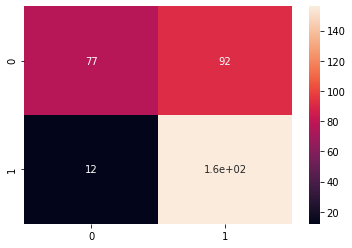

              precision    recall  f1-score   support

           0       0.87      0.46      0.60       169
           1       0.63      0.93      0.75       168

    accuracy                           0.69       337
   macro avg       0.75      0.69      0.67       337
weighted avg       0.75      0.69      0.67       337
 


logistic  model results:


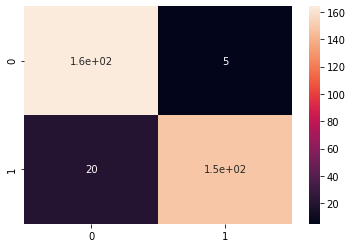

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       169
           1       0.97      0.88      0.92       168

    accuracy                           0.93       337
   macro avg       0.93      0.93      0.93       337
weighted avg       0.93      0.93      0.93       337
 


svm  model results:


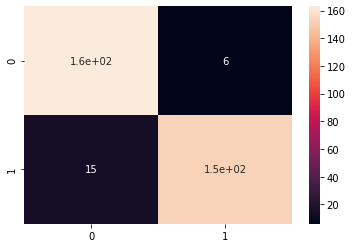

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       169
           1       0.96      0.91      0.94       168

    accuracy                           0.94       337
   macro avg       0.94      0.94      0.94       337
weighted avg       0.94      0.94      0.94       337
 


multinomial_nb  model results:


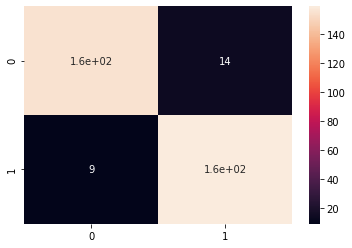

              precision    recall  f1-score   support

           0       0.95      0.92      0.93       169
           1       0.92      0.95      0.93       168

    accuracy                           0.93       337
   macro avg       0.93      0.93      0.93       337
weighted avg       0.93      0.93      0.93       337
 


complement_nb  model results:


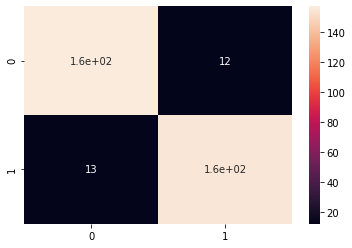

              precision    recall  f1-score   support

           0       0.92      0.93      0.93       169
           1       0.93      0.92      0.93       168

    accuracy                           0.93       337
   macro avg       0.93      0.93      0.93       337
weighted avg       0.93      0.93      0.93       337
 


rf  model results:


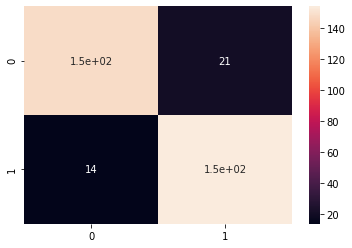

              precision    recall  f1-score   support

           0       0.91      0.88      0.89       169
           1       0.88      0.92      0.90       168

    accuracy                           0.90       337
   macro avg       0.90      0.90      0.90       337
weighted avg       0.90      0.90      0.90       337
 


lgbm  model results:


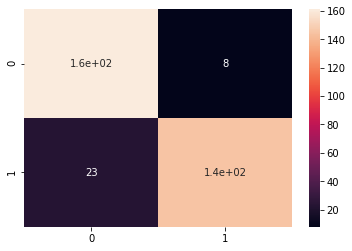

              precision    recall  f1-score   support

           0       0.88      0.95      0.91       169
           1       0.95      0.86      0.90       168

    accuracy                           0.91       337
   macro avg       0.91      0.91      0.91       337
weighted avg       0.91      0.91      0.91       337
 




In [ ]:
results = train_test_model(df, model_list)

In [ ]:
pd.DataFrame(results, index=["accuracy", "f1_score"])

,knn,logistic,svm,multinomial_nb,complement_nb,rf,lgbm
accuracy,0.691395,0.925816,0.937685,0.931751,0.925816,0.896142,0.908012
f1_score,0.750000,0.922118,0.935780,0.932551,0.925373,0.897959,0.903427


In [ ]:
#results_count = train_test_model(df, model_list, vectorizer="count")

In [ ]:
#pd.DataFrame(results_count, index=["accuracy", "f1_score"])